##### Causality¶ pp346

Causality¶ pp346
Our methods for comparing two samples have a powerful use in the analysis of randomized controlled experiments. Since the treatment and control groups are assigned randomly in such experiements, differences in their outcomes can be compared to what would happen just due to chance if the treatment had no effect at all. If the observed differences are more marked than what we would predict as purely due to chance, we will have evidence of causation. Because of the unbiased assignment of individuals to the treatment and control groups, differences in the outcomes of the two groups can be ascribed to the treatment.

The key to the analysis of randomized controlled experiments is understanding exactly how chance enters the picture. This helps us set up clear null and alternative hypotheses. Once that's done, we can simply use the methods of the previous sections to complete the analysis.

EX: Treating Chronic Back Pain: A Randomized Controlled Trial¶
Low-back pain in adults can be very persistent and hard to treat. Common methods exist. A randomized controlled trial (RCT) examined the effect of using Botulinum Toxin A as a treatment. Botulinum toxin is a neurotoxic protein that causes the disease botulism; Wikipedia says that botulinum "is the most acutely lethal toxin known." There are seven types of botulinum toxin. Botulinum Toxin A is one of the types that can cause disease in humans, but it is also used in medicine to treat various diseases involving the muscles. 

The RCT analyzed by Foster, Clapp, and Jabbari in 2001 examined it as a treatment for low back pain.Thirty one patients with low-back pain were randomized into treatment and control groups, with 15 in the treatment group and 16 in control. The control group was given normal saline, and the trials were run double-blind so that neither doctors nor patients knew which group
they were in.

Eight weeks after the start of the study, nine of the 15 in the treatment group and two of the 16 in the control group had pain relief (according to a precise definition used by the researchers). 

These data are in the table bta and appear to show that the treatment has a clear benefit."""

In [1]:
import pandas as pd

In [3]:
bta = pd.read_csv('f:/bta.csv')

In [5]:
bta

,Group,Result
0,Control,1.0
1,Control,1.0
2,Control,0.0
3,Control,0.0
4,Control,0.0
5,Control,0.0
6,Control,0.0
7,Control,0.0
8,Control,0.0
9,Control,0.0


In [4]:
#The sum of 1's in the control group is the number of control group patients who had pain relief. 
#So the average of the number of 1's is the proportion of control group patients who had pain relief.
import numpy as np
bta_table = bta.groupby('Group').mean()

### In the treatment group, 60% of the patients had pain relief, compared to only 12.5% in the control group. None of the patients suffered any side effects.
So the indications are that botulinum toxin A did better than the saline. The patients were assigned at random into the two groups, so perhaps
the difference could just be due to chance?
To understand what this means, we have to consider the possibility that among the 31 people in the study, some were simply better able to recover than others, even without any
help from the treatment. What if an unusually large proportion of them got assigned to the treatment group, just by chance? Then even if the treatment did nothing more than the
saline in the control group, the results of the treatment group might look better than those of the control group.
Set up the chance model. 

In [5]:
bta_table

,Unnamed: 0,Result
Group,,
Control,7.5,0.125
Treatment,23.0,0.600


In [6]:
observed_difference = (bta_table["Result"][1] - bta_table["Result"][0])

### Predicting the Statistic Under the Null Hypothesis
We can simulate results under the null hypothesis, to see how our test statistic should come
out if the null hypothesis is true.
Generating One Value of the Statistic¶

In [7]:
shuffled = bta.sample(31,replace = False)
shuffled

,Unnamed: 0,Group,Result
23,23,Treatment,1.0
10,10,Control,0.0
7,7,Control,0.0
3,3,Control,0.0
4,4,Control,0.0
16,16,Treatment,1.0
0,0,Control,1.0
6,6,Control,0.0
20,20,Treatment,1.0
18,18,Treatment,1.0


In [8]:
bta_shuffled_results = shuffled['Result']
type(bta_shuffled_results)

pandas.core.series.Series

In [9]:
original_and_shuffled= bta.assign(bta_shuffled_results=bta_shuffled_results.values )

In [10]:
original_and_shuffled

,Unnamed: 0,Group,Result,bta_shuffled_results
0,0,Control,1.0,1.0
1,1,Control,1.0,0.0
2,2,Control,0.0,0.0
3,3,Control,0.0,0.0
4,4,Control,0.0,0.0
5,5,Control,0.0,1.0
6,6,Control,0.0,1.0
7,7,Control,0.0,0.0
8,8,Control,0.0,1.0
9,9,Control,0.0,1.0


In [12]:
all_group_means= original_and_shuffled.groupby('Group').mean()
all_group_means

,Unnamed: 0,Result,bta_shuffled_results
Group,,,
Control,7.5,0.125,0.375000
Treatment,23.0,0.600,0.333333


In [13]:
import numpy as np

In [14]:
distance = np.absolute(all_group_means['bta_shuffled_results'][0]- all_group_means['bta_shuffled_results'][1])
#np.absolute(difference)

#### Permutation Test
Tests based on random permutations of the data are called permutation tests. We are performing one in this example. In the cell below, we will simulate our test statistic – the difference between the averages of the two groups – many times and collect the differences in an array. The code in the body of the for loop is just copied over from the cell above. """

In [15]:
import numpy as np
import array
distances = np.zeros(5000)

In [16]:
for i in np.arange(5000):
    shuffled = bta.sample(31,replace = False)
    bta_shuffled_results = shuffled['Result']
    original_and_shuffled= bta.assign(bta_shuffled_results=bta_shuffled_results.values )
    all_group_means= original_and_shuffled.groupby('Group').mean()
    distance = np.absolute(all_group_means['bta_shuffled_results'][0]- all_group_means['bta_shuffled_results'][1])
    distances[i] = distance    

In [18]:
distances

array([0.04166667, 0.04166667, 0.04166667, ..., 0.21666667, 0.0875    ,
       0.17083333])

In [19]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [20]:
distances_df = pd.DataFrame(distances)
distances_df

,0
0,0.041667
1,0.041667
2,0.041667
3,0.170833
4,0.087500
5,0.170833
6,0.041667
7,0.041667
8,0.216667
9,0.087500


Observed Difference: 0.475


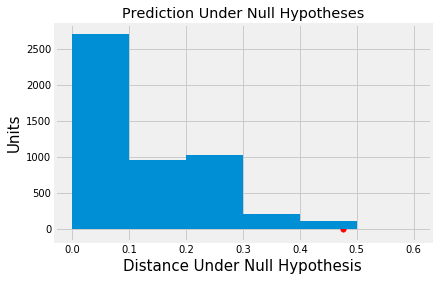

In [21]:
distances_df.hist(bins = np.arange(0,0.7,0.1))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Distance Under Null Hypothesis',fontsize=15)
plt.ylabel('Units',fontsize=15);
plt.scatter(observed_difference, 0, color='red', s=30)
print('Observed Difference:', observed_difference)

If you want to compute an empirical P-value, remember that low values of the statistic favor the alternative hypothesis.

In [24]:
empirical_P = np.count_nonzero(distances >= observed_difference)/distances_df.size
empirical_P

0.0092

In [59]:
print('Observed Distance', observed_difference)
print('Empirical P-value:', round(empirical_P, 2) *100, '%')

Observed Distance 0.475
Empirical P-value: 1.0 %


This is a small P-value. The observed statistc, shown as the red dot below, is in the tail of
the empirical histogram of the test statistic generated under the null hypothesis.
The result is statistically significant. The test favors the alternative hypothesis more than the
null. The evidence supports the hypothesis that the treatment is doing something.

### Causality
Because the trials were randomized, the test is evidence that the treatment causes the
difference. The random assignment of patients to the two groups ensures that there is no
confounding variable that could affect the conclusion of causality.
If the treatment had not been randomly assigned, our test would still point toward an
association between the treatment and back pain outcomes among our 31 patients. But
beware: without randomization, this association would not imply that the treatment caused a
change in back pain outcomes. For example, if the patients themselves had chosen whether
to administer the treatment, perhaps the patients experiencing more pain would be more
likely to choose the treatment and more likely to experience some reduction in pain even
without medication. Pre-existing pain would then be a confounding factor in the analysis.